In [9]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "samira-a2"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
      print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
       print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "samira-a2" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/samira-a2/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
⚠️ WARNING: You are working in the instructor's repo, not your fork!
💡 Please fork the repo to your own account and update `github_username` above.
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine if the aging time of IPA has a statistically significance of the beer's bitterness measured by the IBU

**Question 2.** Specify the outcome variable

The outcome is the level of bitterness measured by IBU

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is the aging time with three levels: levels 3, 4, and 5. Some lurking variables could be chemical exposures in the tank, calibration issues of the machine, human error, etc.

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

A completely randomized experiment is necessary becasue all tanks come from the same initial batch.

**Question 5.** State the null and alternative hypotheses for this experiment.

null hypothesis: Mean IBU is the same for all aging times
Alternative hypothesis: At least one mean IBU differs among the aging time groups.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [11]:
import pandas as pd

# import the IPA data

IPA = pd.read_excel('IPA.xlsx')

## Data integrity check with .info ##

IPA.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

Because both the QQ plot and the Shapiro–Wilk test below indicate that the residuals are approximately normally distributed, the assumption of normality is supported for this ANOVA model


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None


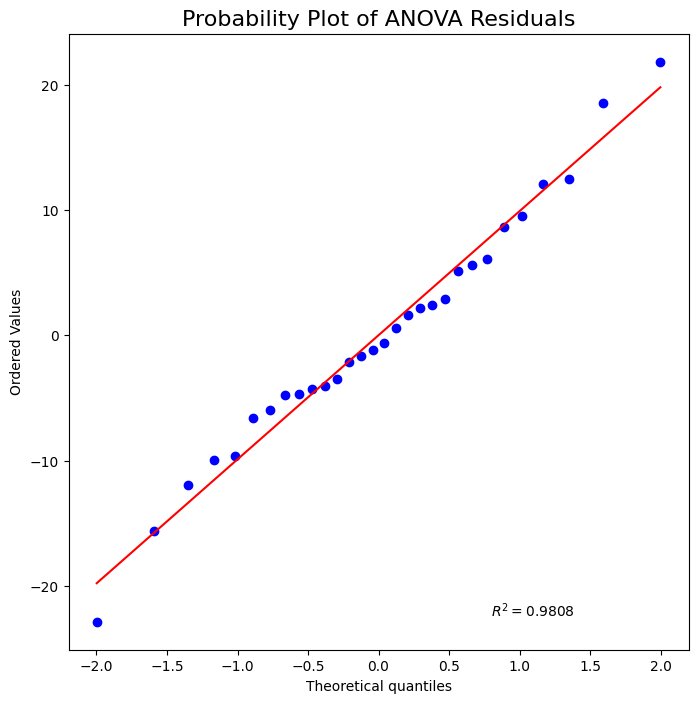

Shapiro-Wilk Test Statistic: 0.9876508728828111
Shapiro-Wilk p-value: 0.9734239573476953


In [13]:
## Import Libraries ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Import IPA Data ##
IPA = pd.read_excel("IPA.xlsx")

## Data Integrity Check ##
print(IPA.info())

## Fit One Way ANOVA Model ##
ipa_mod = ols("IBU ~ Weeks", data=IPA).fit()

## Extract Model Residuals ##
residuals = ipa_mod.resid

## Generate QQ plot ##
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot=plt, rvalue=True)
ax.set_title("Probability Plot of ANOVA Residuals", fontsize=16)

plt.show()

## Shapiro-Wilk Test ##
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

The residuals vs fitted plot below showed a fairly constant spread of residuals across fitted values. The Breusch Pagan test produced a p value > 0.05, so we fail to reject the null hypothesis. Both the visual and formal methods below support the assumption of the homogeneity of variance.



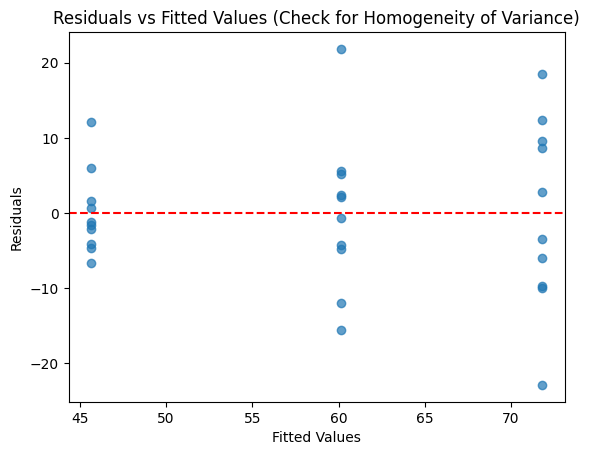

Breusch–Pagan F-statistic: 1.930
Breusch–Pagan p-value: 0.1646


In [15]:
##  Residuals vs Fitted Plot  ##
fitted_vals = ipa_mod.fittedvalues
residuals = ipa_mod.resid

plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Check for Homogeneity of Variance)")
plt.show()

## Breusch–Pagan Test  ##
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(ipa_mod.resid, ipa_mod.model.exog)

f_statistic = bp_test[2]
f_p_value = bp_test[3]

print(f"Breusch–Pagan F-statistic: {f_statistic:.3f}")
print(f"Breusch–Pagan p-value: {f_p_value:.4f}")




**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

The one-way anova below supports the alternative hypothesis. Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the aging time significantly affects beer bitterness.

In [16]:
## One-Way ANOVA Results ##
import statsmodels.api as sm

anova_table = sm.stats.anova_lm(ipa_mod, typ=2)
print(anova_table)


              sum_sq    df          F    PR(>F)
Weeks     3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN



**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


In [2]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Load the data (in case the previous cell wasn't run)
try:
    IPA = pd.read_excel('IPA.xlsx')
except FileNotFoundError:
    print("Error: IPA.xlsx not found. Please make sure the file is in the correct directory.")
    exit()


# Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=IPA['IBU'],
                          groups=IPA['Weeks'],
                          alpha=0.05)

print(tukey.summary())


tukey.plot_simultaneous()
plt.title("Tukey HSD: IBU by Aging Weeks")
plt.show()

Error: IPA.xlsx not found. Please make sure the file is in the correct directory.


NameError: name 'IPA' is not defined


**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.